In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

/tmp/ipython-input-2468568275.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=counts_train, palette="viridis")
/tmp/ipython-input-2468568275.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=counts_test, palette="magma")


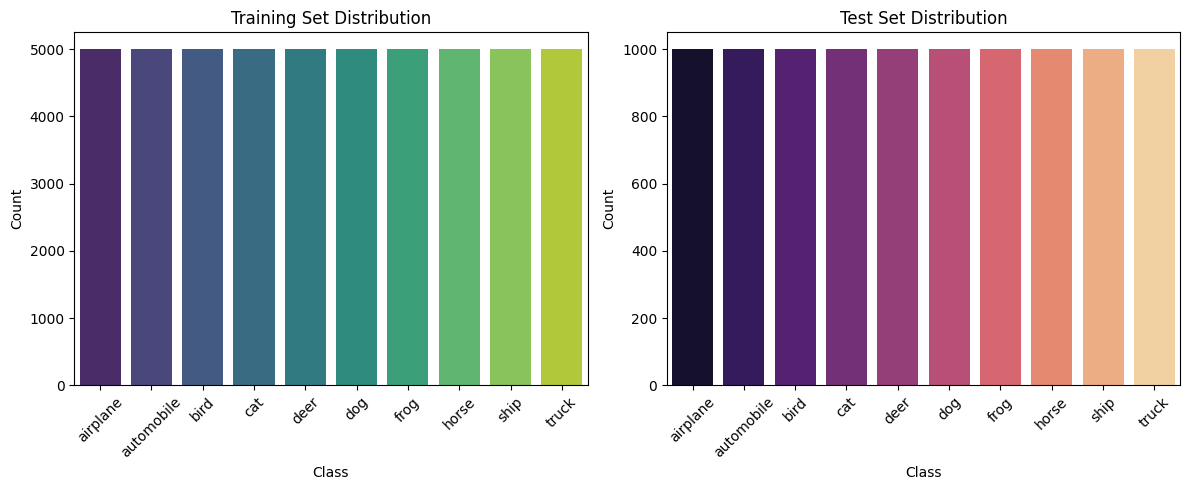

In [4]:
train_labels_flat = train_labels.flatten()
test_labels_flat  = test_labels.flatten()


unique, counts_train = np.unique(train_labels_flat, return_counts=True)
unique, counts_test  = np.unique(test_labels_flat, return_counts=True)

plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
sns.barplot(x=class_names, y=counts_train, palette="viridis")
plt.title("Training Set Distribution")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x=class_names, y=counts_test, palette="magma")
plt.title("Test Set Distribution")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [5]:
import os, random
from tensorflow.keras import layers, models, callbacks, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [7]:
from sklearn.model_selection import train_test_split


train_images = train_images.astype('float32') / 255.0
test_images  = test_images.astype('float32')  / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.10, random_state=SEED, stratify=train_labels.flatten()
)

print("Shapes -> train:", train_images.shape, train_labels.shape,
      "val:", val_images.shape, val_labels.shape,
      "test:", test_images.shape, test_labels.shape)


Shapes -> train: (45000, 32, 32, 3) (45000, 1) val: (5000, 32, 32, 3) (5000, 1) test: (10000, 32, 32, 3) (10000, 1)


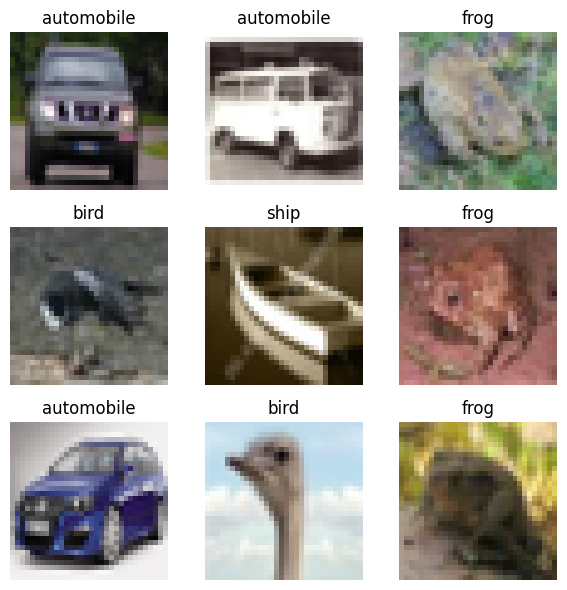

In [8]:

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:

batch_size = 64

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)



In [10]:

def build_cifar_model(input_shape=(32,32,3), num_classes=10, l2=1e-4):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2), input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.25))


    model.add(layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.25))


    model.add(layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.GlobalAveragePooling2D())


    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))   # softmax + sparse CE

    return model

model = build_cifar_model()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             

 Total params: 324,394 (1.24 MB)

 Trainable params: 323,498 (1.23 MB)

 Non-trainable params: 896 (3.50 KB)

In [11]:
initial_lr = 1e-3
opt = tf.keras.optimizers.Adam(learning_rate=initial_lr)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_path = "/content/best_cifar10_weights.weights.h5"
cb_list = [
    callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
]

In [12]:

epochs = 50
steps_per_epoch = train_images.shape[0] // batch_size

history = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=batch_size, shuffle=True),
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(val_images, val_labels),
    callbacks=cb_list,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


703/703 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.2998 - loss: 1.8949 - val_accuracy: 0.3808 - val_loss: 1.7720 - learning_rate: 0.0010
Epoch 2/50
  1/703 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5000 - loss: 1.4571

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.5000 - loss: 1.4571 - val_accuracy: 0.3806 - val_loss: 1.7956 - learning_rate: 0.0010
Epoch 3/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.4988 - loss: 1.4329 - val_accuracy: 0.4244 - val_loss: 2.1619 - learning_rate: 0.0010
Epoch 4/50
  1/703 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4219 - loss: 1.5751
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.4219 - loss: 1.5751 - val_accuracy: 0.4180 - val_loss: 2.2276 - learning_rate: 0.0010
Epoch 5/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.5794 - loss: 1.2356 - val_accuracy: 0.5962 - val_loss: 1.1678 - learning_rate: 5.0000e-04
Epoch 6/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6250 - loss: 1.1104 - val_accuracy: 0.5974 - val_loss: 1.1505 - learning_rate: 5.0000e-04
Epoch 7/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.6021 - loss: 1.

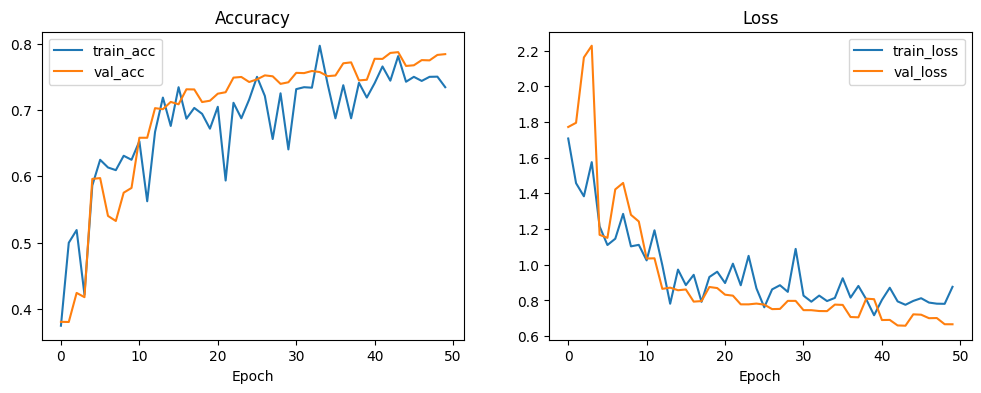

In [13]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss'); plt.xlabel('Epoch'); plt.legend()
plt.show()


In [14]:

model.load_weights(checkpoint_path)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")


313/313 - 3s - 8ms/step - accuracy: 0.7724 - loss: 0.7085
Test accuracy: 0.7724, Test loss: 0.7085


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step


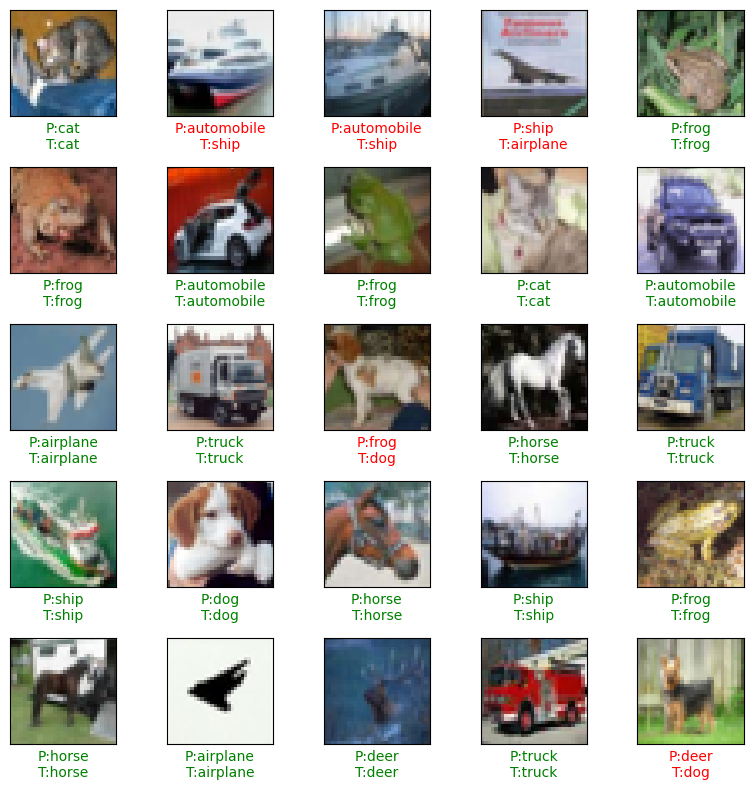

In [15]:

import numpy as np
preds = model.predict(test_images[:25])
pred_labels = np.argmax(preds, axis=1)

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[i])
    plt.xticks([]); plt.yticks([])
    color = 'green' if pred_labels[i] == test_labels[i][0] else 'red'
    plt.xlabel(f"P:{class_names[pred_labels[i]]}\nT:{class_names[test_labels[i][0]]}", color=color)
plt.tight_layout()
plt.show()


In [17]:

model.save("img_classification.keras")

